Following the Qiskit textbook: https://qiskit.org/textbook/

@Mariana R. Barros

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [2]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=6)

HTML(value='<pre>Binary    Decimal\n 000000 = 0</pre>')

## First quantum circuit

In [3]:
n = 8
n_q = n #number of qubits in the circuit.
n_b = n #number of output bits we will extract from the circuit at the end.
qc_output = QuantumCircuit(n_q,n_b)

In [4]:
#adding a measure operation to each of our eight qubits
#.measure(j,j): adds a measurement to our circuit that tells qubit j to write an output to bit j
for j in range(n):
    qc_output.measure(j,j)

In [5]:
#Visualing the circuit
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

Since we don't do anything to our qubits in the circuit above, and the qubits are always initialized to give the output 0, by running the circuit many times and plotting the results in a histogram we find that the result is always 00000000: a 0 from each qubit:

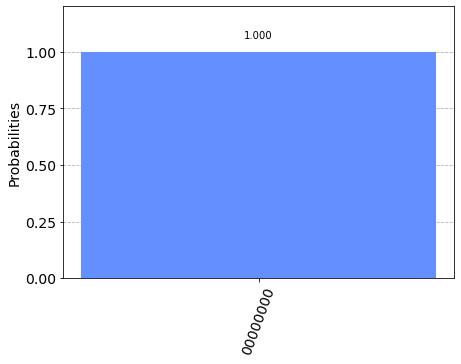

In [6]:
sim = Aer.get_backend('aer_simulator')  # this is the simulator we'll use
qobj = assemble(qc_output)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts)

#### Obs: 
This result comes from a quantum simulator, which is a standard computer calculating what an ideal quantum computer would do. Simulations are only possible for small numbers of qubits (~30 qubits).

To run on a real device you simply need to replace Aer.get_backend('aer_simulator') with the backend object of the device you want to use.

#### Example: Creating an Adder Circuit 

In [7]:
#NOT gate - i.e., X quantum gate
qc_encode = QuantumCircuit(n) #creating a quantum circuit of n qbits
qc_encode.x(7) #applying x gate into the 7th qubit
qc_encode.draw() #drawing the circuit

#obs: remember here that we already setted n = 8.

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [8]:
#creating a new circuit that contains the n qbits + the measuremnt part  
qc = qc_encode + qc_output
qc.draw()

<ipython-input-8-124e0b37295c>:2: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = qc_encode + qc_output
/opt/anaconda3/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:869: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


┌─┐                     
q_0: ─────┤M├─────────────────────
          └╥┘┌─┐                  
q_1: ──────╫─┤M├──────────────────
           ║ └╥┘┌─┐               
q_2: ──────╫──╫─┤M├───────────────
           ║  ║ └╥┘┌─┐            
q_3: ──────╫──╫──╫─┤M├────────────
           ║  ║  ║ └╥┘┌─┐         
q_4: ──────╫──╫──╫──╫─┤M├─────────
           ║  ║  ║  ║ └╥┘┌─┐      
q_5: ──────╫──╫──╫──╫──╫─┤M├──────
           ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ──────╫──╫──╫──╫──╫──╫─┤M├───
     ┌───┐ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├
     └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/══════╩══╩══╩══╩══╩══╩══╩══╩═
           0  1  2  3  4  5  6  7

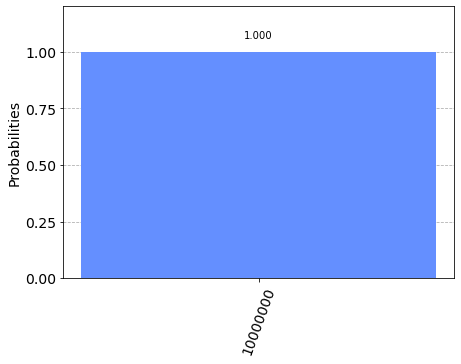

In [9]:
#running and ploting the results
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

Now our computer outputs the string 10000000 instead.

The bit we flipped, which comes from qubit 7, lives on the far left of the string. This is because Qiskit numbers the bits in a string from right to left. Some prefer to number their bits the other way around, but Qiskit's system certainly has its advantages when we are using the bits to represent numbers. 

Specifically, it means that qubit 7 is telling us about how many  
2^7 s we have in our number. So by flipping this bit, we’ve now written the number 128 in our simple 8-bit computer.

In [10]:
#### Exercice: trying a new number: 36 =  100100
qc_encode2 = QuantumCircuit(6)
qc_encode2.x(2)
qc_encode2.x(5)

qc_encode2.draw()

q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ X ├
     └───┘

In [11]:
n_q = 6 #number of qubits in the circuit.
n_b = 6 #number of output bits we will extract from the circuit at the end.
qc_output2 = QuantumCircuit(n_q,n_b)

for j in range(6):
    qc_output2.measure(j,j)

qc_output2.draw()   

┌─┐               
q_0: ┤M├───────────────
     └╥┘┌─┐            
q_1: ─╫─┤M├────────────
      ║ └╥┘┌─┐         
q_2: ─╫──╫─┤M├─────────
      ║  ║ └╥┘┌─┐      
q_3: ─╫──╫──╫─┤M├──────
      ║  ║  ║ └╥┘┌─┐   
q_4: ─╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║ └╥┘┌─┐
q_5: ─╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║ └╥┘
c: 6/═╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5

In [12]:
qc2 = qc_encode2 + qc_output2
qc2.draw()

┌─┐               
q_0: ─────┤M├───────────────
          └╥┘┌─┐            
q_1: ──────╫─┤M├────────────
     ┌───┐ ║ └╥┘      ┌─┐   
q_2: ┤ X ├─╫──╫───────┤M├───
     └───┘ ║  ║ ┌─┐   └╥┘   
q_3: ──────╫──╫─┤M├────╫────
           ║  ║ └╥┘┌─┐ ║    
q_4: ──────╫──╫──╫─┤M├─╫────
     ┌───┐ ║  ║  ║ └╥┘ ║ ┌─┐
q_5: ┤ X ├─╫──╫──╫──╫──╫─┤M├
     └───┘ ║  ║  ║  ║  ║ └╥┘
c: 6/══════╩══╩══╩══╩══╩══╩═
           0  1  3  4  2  5

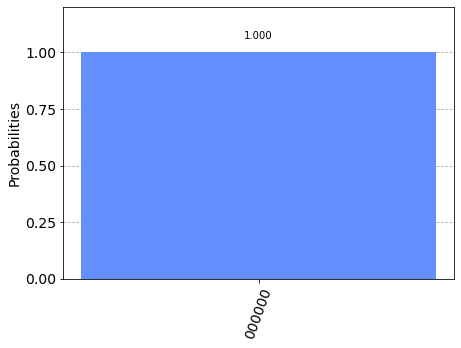

In [13]:
qobj2 = assemble(qc_output2)  # this turns the circuit into an object our backend can run
result2 = sim.run(qobj2).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts2 = result2.get_counts()
# and display it on a histogram
plot_histogram(counts2)

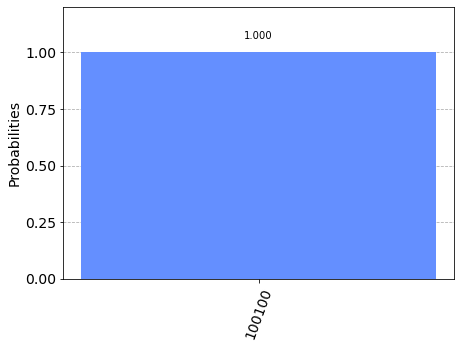

In [14]:
qobj2 = assemble(qc2)
counts2 = sim.run(qobj2).result().get_counts()
plot_histogram(counts2)

## Adding qubits

To add 2 qubits we need to perform the following: 

0+0 = 00

0+1 = 01

1+0 = 01

1+1 = 10

This is achieved by the use of a CNOT (in a classical computer, a XOR gate)


#### Obs: 
CNOT action: it looks at its two input bits to see whether they are the same or different. Next, it overwrites the target qubit with the answer. The target becomes 0 if they are the same, and 1 if they are different.

In [15]:
qc_cnot = QuantumCircuit(2) #quantum circuit of 2 qubits
qc_cnot.cx(0,1) #cnot between qubits 0 and 1
qc_cnot.draw() #draw the circuit

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

control qubit: the one with the little dot

target qubit: with the big square

#### Cnot example

In [16]:
qc = QuantumCircuit(2,2)
qc.x(0) #apply x on qubit 0; It becomes 1
qc.cx(0,1) #apply cnot between qbit 0 and 1
qc.measure(0,0) 
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

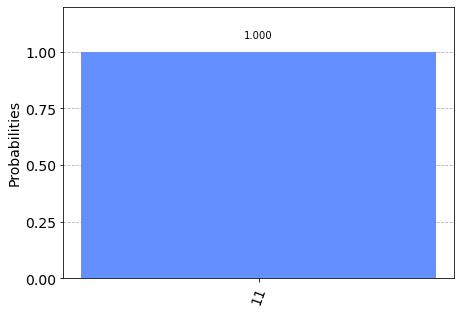

In [17]:
qobja = assemble(qc)  # this turns the circuit into an object our backend can run
resulta = sim.run(qobja).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
countsa = resulta.get_counts()
# and display it on a histogram
plot_histogram(countsa)

Thefore, by running the circut above, we found that the output is 11. We can think of this happening because of either of the following reasons:

* The CNOT calculates whether the input values are different and finds that they are, which means that it wants to output 1. It does this by writing over the state of qubit 1 (which, remember, is on the left of the bit string), turning 01 into 11.

* The CNOT sees that qubit 0 is in state 1, and so applies a NOT to qubit 1. This flips the 0 of qubit 1 into a 1, and so turns 01 into 11.

Here is a table showing all the possible inputs and corresponding outputs of the CNOT gate:

    Input (q1 q0)	Output (q1 q0)

            00	      00

            01	      11

            10	      10

            11	      01

==> If we don’t want to overwrite one of our inputs but, instead, write the result on a different pair of qubits, can use two CNOTs and a Toffoli gate (AND classical gate):

In [18]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

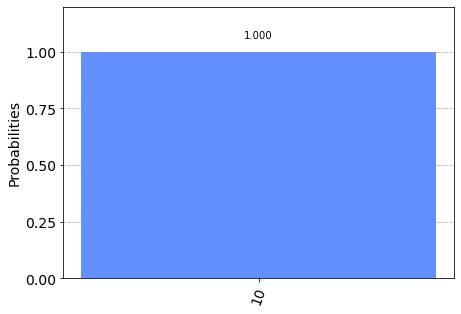

In [19]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

Therefore, in this example, we are calculating 1+1, because the two input bits are both 1. The result is 10, which is the binary representation of the number 2. We have built a computer that can solve the famous mathematical problem of 1+1